In [2]:
import requests
import pandas as pd
import csv
import os
import time
import matplotlib.pyplot as plt

In [3]:
csv_columns = ["time","method","route","time_took",'ip',"status"]

def download_file():
    url = "https://dogshit.ngrok.app/"
    r = requests.get(url, allow_redirects=True)
    open('request_logs.csv', 'wb').write(r.content)

def read_csv():
    df = pd.read_csv("request_logs.csv")
    return df

In [4]:
download_file()
df = read_csv()

# set column names
df.columns = csv_columns

# remove rows with missing values
df = df.dropna()

# convert time to datetime, sample format: 2024-03-05 14:22:03
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
df = df.sort_values(by='time')
df_lite = df.sample(2000)

Text(0.5, 1.0, 'Index vs Time Took')

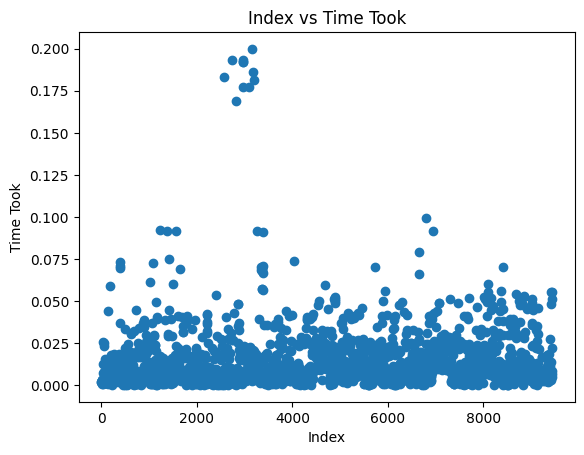

In [5]:
plt.scatter(df_lite.index, df_lite['time_took'])
plt.xlabel('Index')
plt.ylabel('Time Took')
plt.title('Index vs Time Took')

Text(0.5, 1.0, 'Top 10 Slowest Routes')

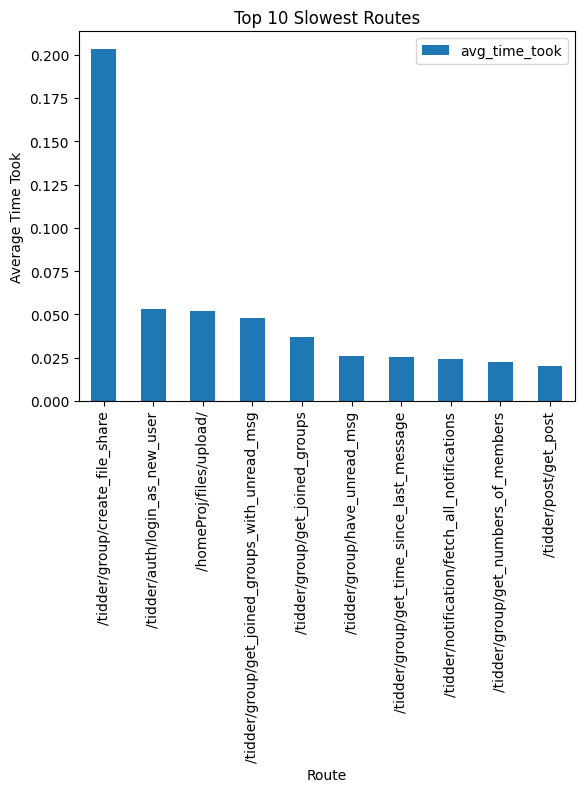

In [6]:
d = pd.DataFrame()
_df = df.copy()
# split the route by /, remove the digits from the end
def clean_route_name(route):
    elements = route.split('/')
    elements = [e for e in elements if not e.isnumeric()]
    return '/'.join(elements)

_df['route'] = _df['route'].apply(clean_route_name)

d['avg_time_took'] = _df.groupby('route')['time_took'].mean()
d = d.sort_values(by='avg_time_took', ascending=False)

# plot the top 10 slowest routes
d.head(10).plot(kind='bar')
plt.xlabel('Route')
plt.ylabel('Average Time Took')
plt.title('Top 10 Slowest Routes')


<Axes: xlabel='time'>

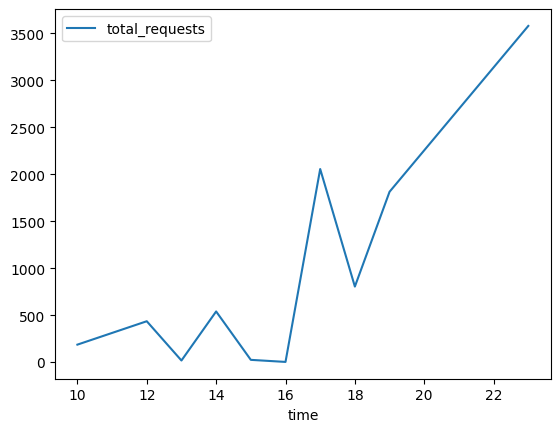

In [10]:
_df = df.copy()
_df['time'] = _df['time'].dt.hour
d = pd.DataFrame()
d['total_requests'] = _df.groupby('time')['time'].count()
d.plot()